In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Q1 and 2 are not needed

# Question 3:
# Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between
# salary and experience with exerience in x-axis and salary in y axis.
# a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph
# between beta and mean squared error(MSE) for each case.
# b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between
# beta and mean squared error(MSE).
# c. Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between
# beta and mean squared error(MSE).
# d. Use the scikit learn and compare the results of MSE.

In [3]:
df1 = pd.read_csv('q1.csv')

In [4]:
X = df1['experience']
y = df1['salary']

In [5]:
def get_errors(y_pred, y):
    error = np.mean(abs(y_pred - y))
    mse = np.mean((y_pred - y) ** 2)
    rmse = np.sqrt(np.mean((y_pred - y) ** 2))
    print(f"Error: {error}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    
    return error, mse, rmse

In [6]:
def linear_regression(X, y, alpha, epochs):
    b0 = np.random.rand() * 0.01
    b1 = np.random.rand() * 0.01
    costs = []
    slopes = []
    
    for i in range(epochs):
        for j in range(len(X)):
            y_hat = b1*X[j] + b0
            error = y_hat - y[j]
            b0 -= error * alpha
            b1 -= error * alpha * X[j]
            costs.append(np.sqrt(np.mean(((b1*X + b0) - y) ** 2)))
            slopes.append(b1)
    
    y_pred = b1*X + b0
    get_errors(y_pred, y)
    
    return costs, y_pred, slopes

In [7]:
costs, y_pred, _ = linear_regression(X, y, 0.01, 5)

Error: 0.3701378805741257
MSE: 0.263267603874233
RMSE: 0.5130960961401216


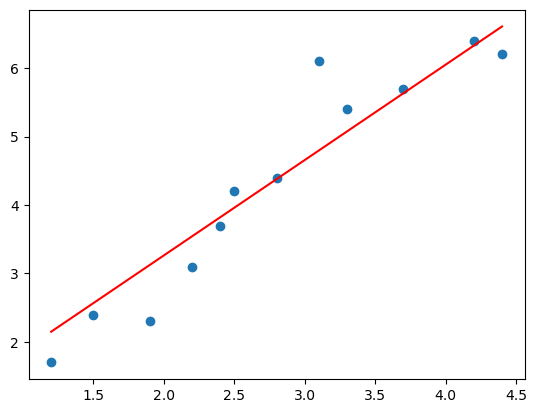

In [8]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

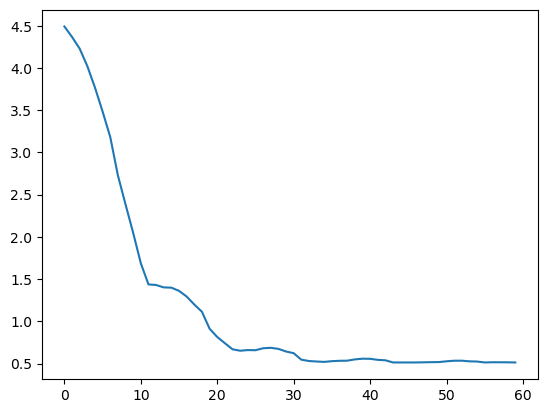

In [9]:
plt.plot(range(len(costs)), costs)

In [10]:
mse_a = []
b = [0.1, 1.5, 0.8]

for b1 in b:
    mse_a.append(np.mean(((b1*X + 1.1) - y) ** 2))

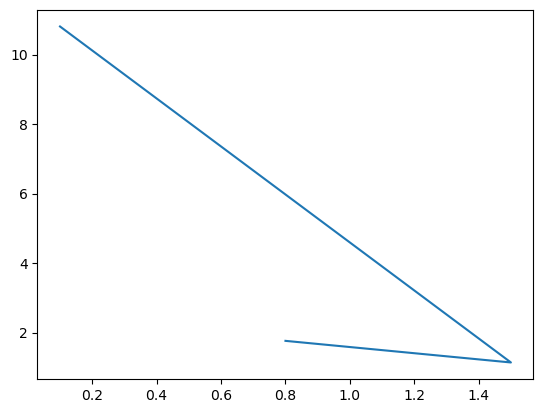

In [11]:
plt.plot(b, mse_a)

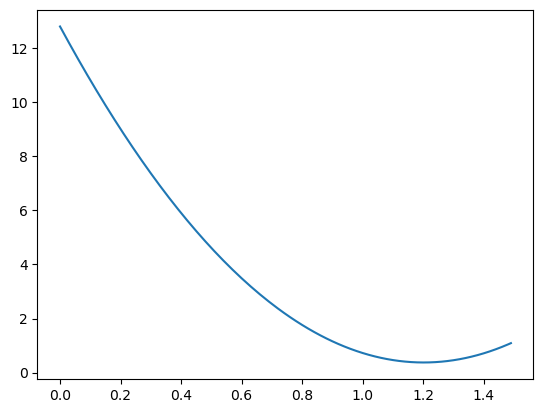

In [12]:
mse_b = []
b = []
b1 = 0
while(b1 <= 1.5):
    mse_b.append(np.mean(((b1*X + 1.1) - y) ** 2))
    b.append(b1)
    b1 += 0.01

plt.plot(b, mse_b)

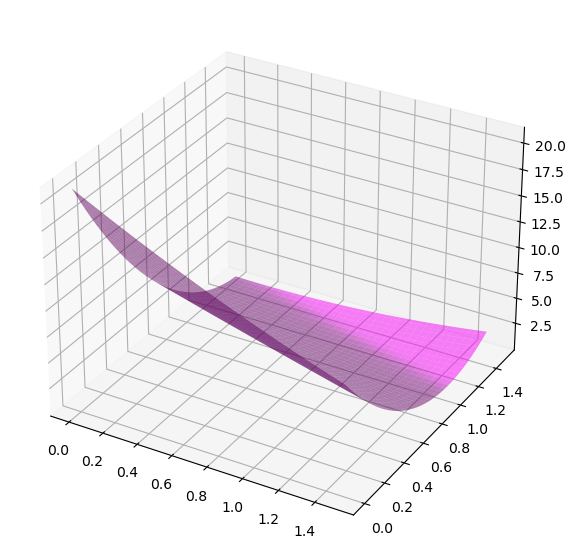

In [13]:
from mpl_toolkits.mplot3d import Axes3D

b0 = np.arange(0, 1.51, 0.01)
b1 = np.arange(0, 1.51, 0.01)

mse_c = []
for i in b1:
    z = []
    for j in b0:
        y_pred = i*X + j
        z.append(np.mean(((i*X + j) - y) ** 2))
    mse_c.append(z)
mse_c = np.array(mse_c)


B0, B1 = np.meshgrid(b0, b1)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B0, B1, mse_c, color='magenta', alpha=0.5)
plt.show()

In [14]:
from sklearn.linear_model import SGDRegressor

X = df1[['experience']].values
y = df1['salary'].values

sgd = SGDRegressor(max_iter=60, eta0=0.01)
sgd.fit(X, y)

sk_pred = sgd.predict(X)

get_errors(sk_pred, y)

Error: 0.3592750427094473
MSE: 0.2578628204490489
RMSE: 0.5078019500248585


(0.3592750427094473, 0.2578628204490489, 0.5078019500248585)

In [15]:
# Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1
# and error for 60 iterations of 5 epochs.
# a. Plot the graph of log loss/error versus iteration.
# b.Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs.
# c. Plot the graph between beta (X-axis) and log loss/ error (Y-axis) using scikit learn and your approach
# separately.
# d. Plot the separate graph of –log(x) ( y=1 case) and –log(1-x) (y=0 case) and also draw the combined graph of
# .both cases.

Error: 0.37005695732479055
MSE: 0.2632050642290532
RMSE: 0.5130351491165622


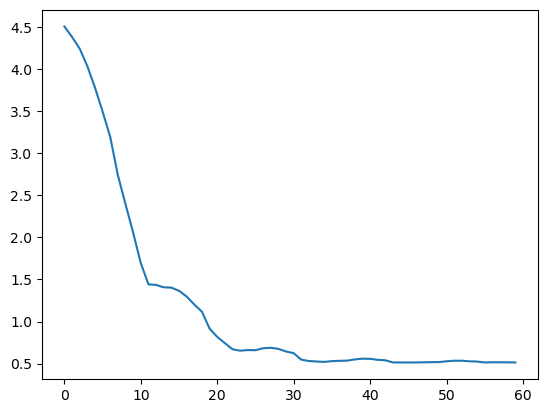

In [16]:
X = df1['experience']
y = df1['salary']

costs, y_pred, _ = linear_regression(X, y, 0.01, 5)
plt.plot(range(len(costs)), costs)

Error: 0.4341855624249105
MSE: 0.35611894501307817
RMSE: 0.5967570234300373


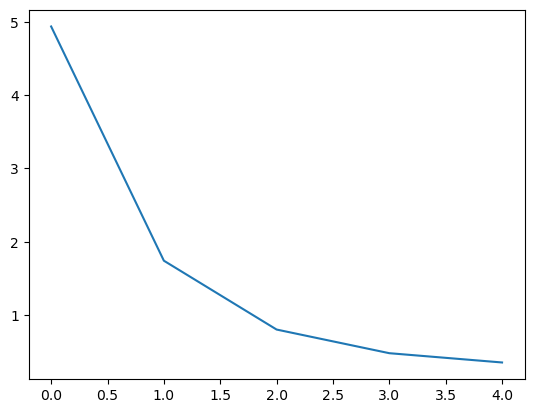

In [17]:
from sklearn.linear_model import SGDRegressor

X = df1[['experience']].values
y = df1['salary'].values

sgd = SGDRegressor(max_iter=5, eta0=0.01)
costs = []

for _ in range(5):
    sgd.partial_fit(X, y)
    y_pred = sgd.predict(X)
    loss = np.mean((y - y_pred) ** 2)
    costs.append(loss)

get_errors(y_pred, y)
plt.plot(range(len(costs)), costs)

In [18]:
# Question 5
# Consider positive and negative slope dataset given below. Apply simple linear regression with gradient
# descent and illustrate the difference between slope values for both cases at different iterations. Plot the graph
# of slope(x-axis) vs MSE (y-axis) for both case separately.
# x = np.array([1, 2, 4, 3, 5])
# y = np.array([1, 3, 3, 2, 5]) # Positive slope
# x = np.array([1, 2, 3, 4, 5])
# y = np.array([10, 8, 6, 4, 2]) # Negative slope

In [19]:
x_pos = np.array([1, 2, 4, 3, 5])
y_pos = np.array([1, 3, 3, 2, 5])

x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([10, 8, 6, 4, 2])

Error: 0.621481984683968
MSE: 0.48472355785908966
RMSE: 0.6962209116789654


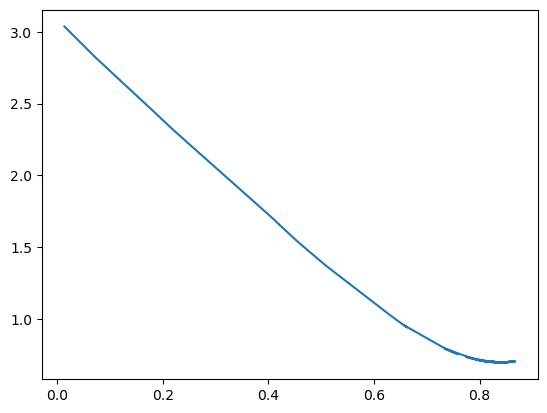

In [20]:
costs_p, y_pred_p, slopes_p = linear_regression(x_pos, y_pos, 0.01, 10)
plt.plot(slopes_p, costs_p)

Error: 3.7951662742962666
MSE: 21.256014645827825
RMSE: 4.6104245624267435


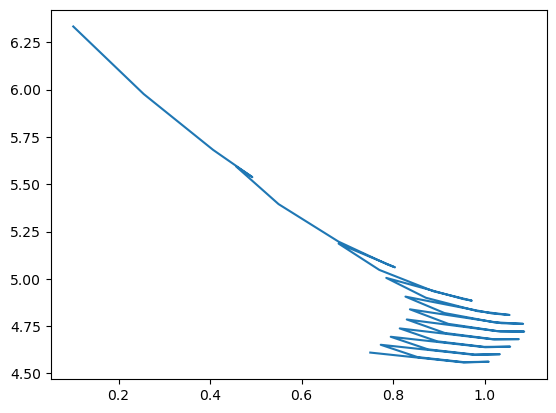

In [21]:
costs_n, y_pred_n, slopes_n = linear_regression(x_neg, y_neg, 0.01, 10)
plt.plot(slopes_n, costs_n)

In [22]:
# Consider positive and negative slope dataset given below. Apply logistic regression with gradient
# descent and illustrate the difference between slope values for both cases at different iterations. Plot the
# graph of slope(x-axis) vs log-loss (y-axis) for both case separately.
# x = np.array([1, 2, 3, 4, 5])
# y = np.array([0, 0, 1, 1, 1]) # Positive slope
# x = np.array([1, 2, 3, 4, 5])
# y = np.array([1, 1, 0, 0, 0]) # Negative slope

In [23]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def logistic_regression(X, y, alpha, epochs):
    b0 = np.random.rand() * 0.01
    b1 = np.random.rand() * 0.01
    costs = []
    slopes = []
    
    for i in range(epochs):
        for j in range(len(X)):
            y_hat = sigmoid(b1*X[j] + b0)
            error = y_hat - y[j]
            b0 -= error * alpha
            b1 -= error * alpha * X[j]
            log_loss = -np.mean(y_hat*np.log(y_hat) + (1-y_hat)*np.log(1-y_hat))
            costs.append(log_loss)
            slopes.append(b1)
    
    y_pred = b1*X + b0
    get_errors(y_pred, y)
    
    return costs, y_pred, slopes

In [24]:
x_pos = np.array([1, 2, 3, 4, 5])
y_pos = np.array([0, 0, 1, 1, 1])

x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([1, 1, 0, 0, 0])

Error: 0.2733327939866457
MSE: 0.09847666758094623
RMSE: 0.31380992269357294


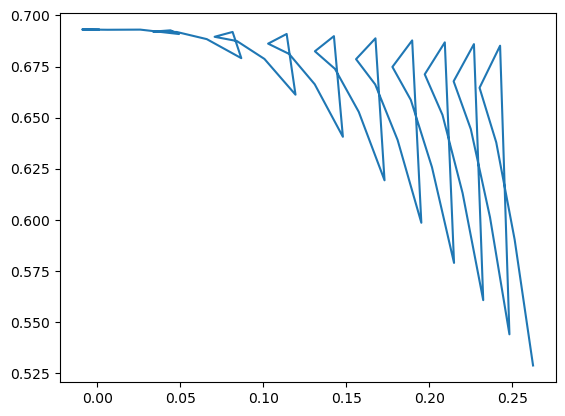

In [25]:
costs_p, y_pred_p, slopes_p = logistic_regression(x_pos, y_pos, 0.01, 10)
plt.plot(slopes_p, costs_p)

Error: 1.1773828382309426
MSE: 1.4495060367548276
RMSE: 1.2039543333344616


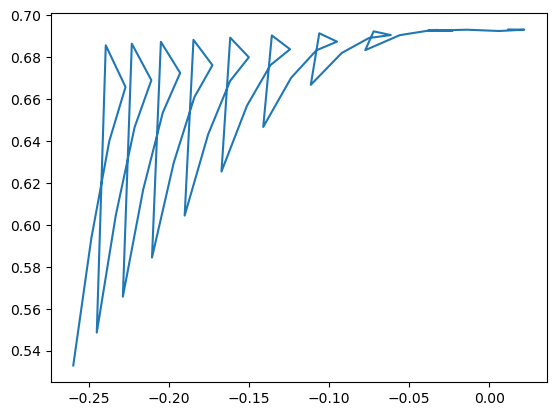

In [26]:
costs_n, y_pred_n, slopes_n = logistic_regression(x_neg, y_neg, 0.01, 10)
plt.plot(slopes_n, costs_n)